# Plotting Sigmoid function

In [63]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split

$S_{w,b} = \frac{1}{1+e^{-(wx+b)}}$

In [3]:
def sigmoid(x,w,b):
    return 1/(1+np.exp(-(w*x+b)))

In [4]:
X = np.linspace(-10,10,100)
w = 1
b = 0
Y = sigmoid(X,w,b) # Note python broadcasting 

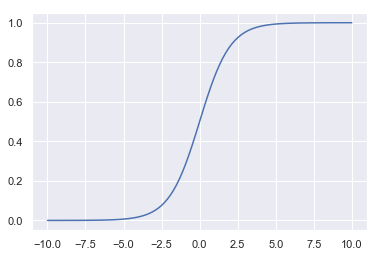

In [5]:
sns.set()
plt.plot(X,Y)

$S(x_1,x_2) = \frac{1}{1+e^{-(w_1x_1+w_2x_2+b)}}$

In [6]:
def sigmoid_2d(x_1, x_2, w_1, w_2, b):
    return 1/(1+np.exp(-(w_1*x_1+w_2*x_2+b)))
    

In [7]:
from mpl_toolkits import mplot3d

X1 = np.linspace(-10,10,100)
X2 = np.linspace(-10,10,100)

XX1, XX2 = np.meshgrid(X1, X2)

In [8]:
w_1 = 0.5
w_2 = 0.5
b = 0
YY = sigmoid_2d(XX1,XX2,w_1,w_2,b)

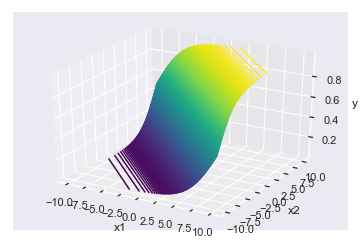

In [9]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(XX1, XX2, YY, 400, cmap='viridis')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y');
#ax.view_init(30,180)

In [10]:
# Computing the model parameters using grid search

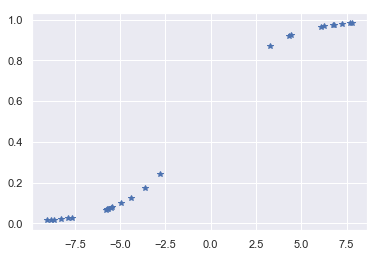

In [11]:
w_unknown = 0.5
b_unknown = 0.25

X = np.random.random(25) * 20 - 10
Y = sigmoid(X, w_unknown, b_unknown)

plt.plot(X,Y,'*')

In [12]:
def compute_loss(X, Y, w_est, b_est):
    loss = 0
    for x,y in zip(X,Y):
        loss = loss + (y - sigmoid(x, w_est, b_est))**2
    return loss

In [13]:
W = np.linspace(0,2,100)
B = np.linspace(-1,1,100)

WW, BB = np.meshgrid(W, B)

In [14]:
Loss = np.zeros(WW.shape)
for i in range(WW.shape[0]):
    for j in range(WW.shape[1]):
        Loss[i,j] = compute_loss(X, Y, WW[i,j], BB[i,j])
        

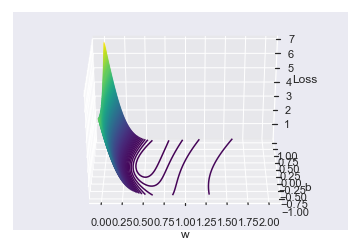

In [15]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(WW, BB, Loss, 200, cmap='viridis')
ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_zlabel('Loss');
ax.view_init(30,270)

In [16]:
ij = np.argmin(Loss)
i = int(np.floor(ij/Loss.shape[1]))
j = int(ij - Loss.shape[1]*i)
print(Loss[i,j], WW[i,j], BB[i,j])

5.245494320295277e-05 0.5050505050505051 0.2525252525252526


In [17]:
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("",['red','yellow','green'])

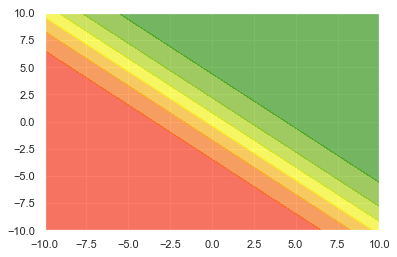

In [18]:
# Plotting contour maps
plt.contourf(XX1, XX2, YY, cmap=my_cmap, alpha=0.6)
plt.show()

In [90]:
class SigmoidNeuron():
    
    def __init__(self):
        self.w = None
        self.b = None
    
    def perceptron(self, x):
        return np.dot(x, self.w.T) + self.b
        
    def sigmoid(self, x):
        return 1.0/(1.0 + np.exp(-x))
    
    def grad_w(self, x, y):
        y_pred = self.sigmoid(self.perceptron(x))
        return (y_pred - y) * y_pred * (1-y_pred) * x
    
    def grad_b(self, x, y):
        y_pred = self.sigmoid(self.perceptron(x))
        return (y_pred - y) * y_pred * (1-y_pred)
    
    def fit(self, X, Y, epochs=1, learning_rate=1, initialize=True):
        if initialize:
            self.w = np.random.randn(1, X.shape[1])
            self.b = 0
        
        for i in range(epochs):
            dw = 0
            db = 0
            for x,y in zip(X,Y):
                dw = dw + self.grad_w(x, y)
                db = db + self.grad_b(x, y)
            self.w = self.w - learning_rate*dw
            self.b = self.b - learning_rate*db
            
    def predict(self, X):
        Y_pred = []
        for x in X:
            y_pred = self.sigmoid(self.perceptron(x))
            Y_pred.append(y_pred)
        return np.array(Y_pred)

In [20]:
X = np.asarray([[2.5, 2.5], [1,-4], [4,-1], [-3,1.25], [-2,-4], [1,5]])
Y = [1, 1, 1, 0 , 0, 0]

In [21]:
sn = SigmoidNeuron()
sn.fit(X, Y, 1, 0.5, True)

In [22]:
def plot_sn(X, Y, sn, ax):
    X1 = np.linspace(-10, 10, 100)
    X2 = np.linspace(-10, 10, 100)
    XX1, XX2 = np.meshgrid(X1, X2)
    YY = np.zeros(XX1.shape)
    for i in range(X2.size):
        for j in range(X1.size):
            val = np.asarray([X1[j],X2[i]])
            YY[i,j] = sn.sigmoid(sn.perceptron(val))
    ax.contourf(XX1, XX2, YY, cmap=my_cmap, alpha=0.6)
    ax.scatter(X[:,0],X[:,1],c=Y, cmap=my_cmap)
    ax.plot()

[[-0.29667556 -0.58617903]] [0.05329505]
[[ 0.68023615 -0.57551035]] [0.09802919]
[[ 1.08608325 -0.0110792 ]] [0.05692055]
[[ 1.03849707 -0.62707855]] [-0.02418221]
[[ 1.34716573 -0.13748458]] [-0.1000668]
[[ 1.26725584 -0.71239152]] [-0.20199235]
[[ 1.53986141 -0.26001038]] [-0.27299634]
[[ 1.46904093 -0.7165065 ]] [-0.36328733]
[[ 1.65542026 -0.40750741]] [-0.41759775]
[[ 1.63062852 -0.6256528 ]] [-0.47050183]
[[ 1.70255813 -0.53614242]] [-0.50089992]
[[ 1.72146842 -0.57806315]] [-0.53022279]
[[ 1.75254555 -0.57858857]] [-0.55542763]
[[ 1.77844038 -0.58849732]] [-0.57920253]
[[ 1.80348125 -0.59625888]] [-0.60131797]
[[ 1.82714917 -0.6038042 ]] [-0.62203608]
[[ 1.84964676 -0.61096455]] [-0.64150107]
[[ 1.87107959 -0.61778786]] [-0.65984412]
[[ 1.89154322 -0.62430422]] [-0.67717728]
[[ 1.91112094 -0.63054007]] [-0.69359731]


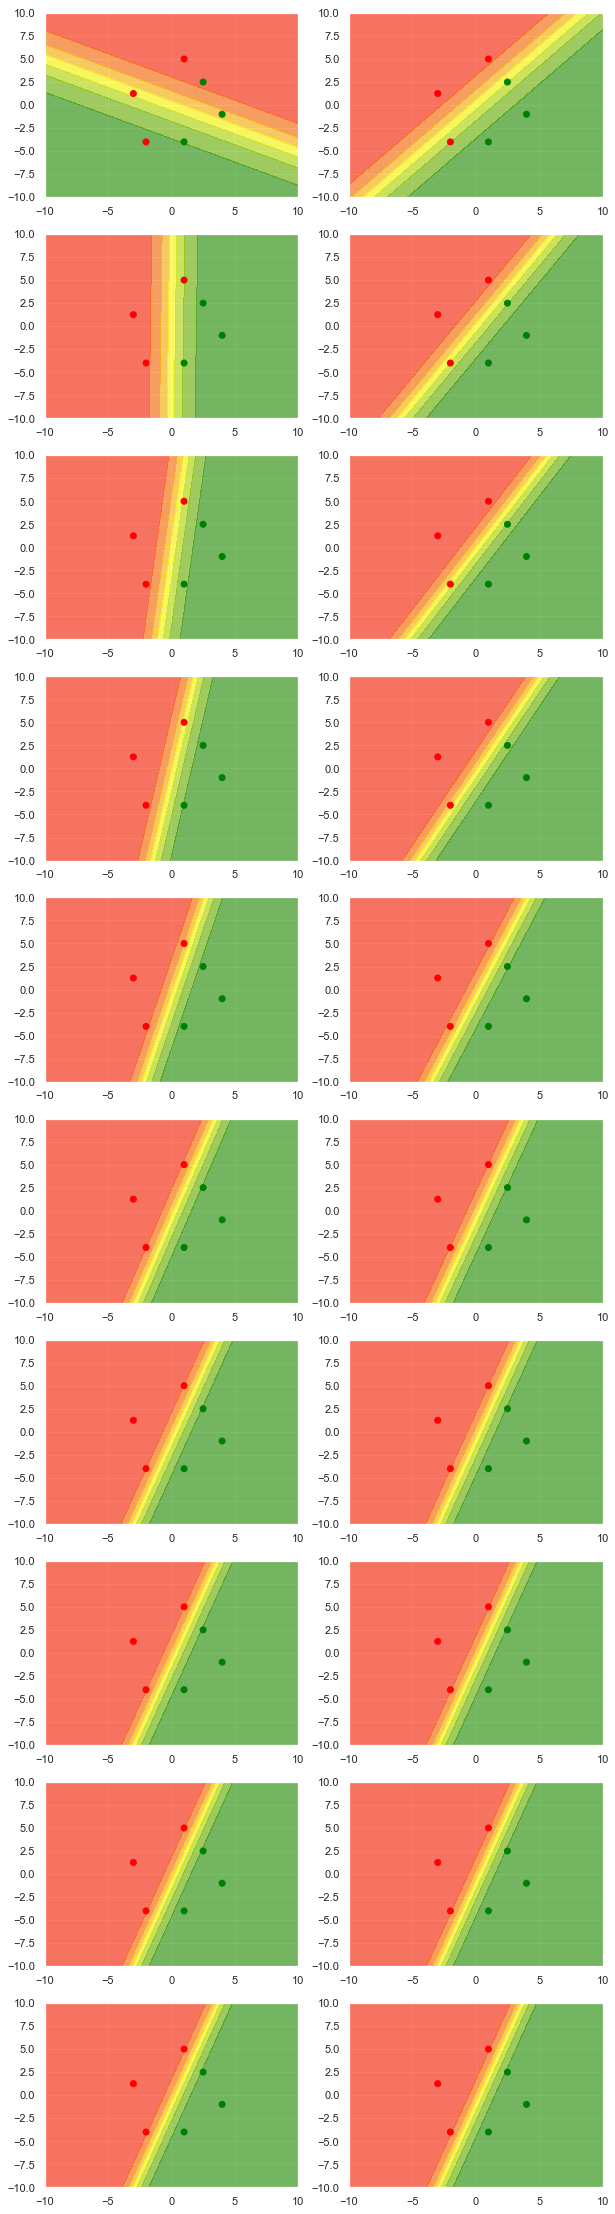

In [23]:
N = 20
plt.figure(figsize=(10,2*N))
for i in range(N):
    sn.fit(X, Y, 1, 0.75, False)
    ax = plt.subplot(N//2, 2, i+1)
    plot_sn(X, Y, sn, ax)
    print(sn.w, sn.b)

# Load Data

In this section, we are going to work with a data set that shows rating of several mobile phones. It consists of a bunch of features which be used to come up with a machine learning model to predict ratings of a new phone. 

In [24]:
data  = pd.read_csv('mobile_cleaned.csv')

Let us see how this data set looks like. It consists of features having both numerical and categorical values. Categorical features have been converted to numerical features using one hot encoding. 

In [26]:
data.head()

,PhoneId,Pixel Density,Screen Size,Weight,RAM,Processor_frequency,Screen to Body Ratio (calculated),Height,Internal Memory,Capacity,...,os_name_Tizen,os_name_iOS,"SIM Slot(s)_Dual SIM, GSM+CDMA","SIM Slot(s)_Dual SIM, GSM+GSM","SIM Slot(s)_Dual SIM, GSM+GSM, Dual VoLTE","SIM Slot(s)_Single SIM, GSM",Sim1_2G,Sim1_3G,Sim1_4G,Rating
0,0,403,6.26,182,4,1.8,80.68,157.9,64,4000,...,0,0,0,0,1,0,0,0,1,4.5
1,1,271,6.20,168,3,1.8,80.85,156.2,32,4230,...,0,0,0,0,1,0,0,0,1,4.5
2,2,409,6.30,168,3,2.1,83.68,157.0,32,3500,...,0,0,0,0,1,0,0,0,1,4.4
3,4,411,6.00,169,4,2.2,74.78,159.8,64,3300,...,0,0,0,1,0,0,0,0,1,4.3
4,5,396,6.50,175,4,2.2,84.23,160.4,64,3750,...,0,0,0,0,1,0,0,0,1,4.4


Let us separate the features and output. Output, which is the rating of the phone, is stored as last feature in data variable.

In [30]:
X = data.drop('Rating', axis=1)
Y = data['Rating'].values

Now, for the purpose of determining the accuracy of the classifier, we must binarize our output as like(1)/dislike(0) catagories. In order to do so, we must select a threshold on Ratings below which we put the class as 0. We try a threshold of 4 to see if we get a balanced data set.

In [36]:
threshold = 4
data['Class'] = (data['Rating'] > threshold).astype(np.int)
data['Class'].value_counts(normalize=True)

1    0.58651
0    0.41349
Name: Class, dtype: float64

We find that the class is imbalanced. We can then try several thresholds and see if we can have a distribution of 50%. 
Indeed, we can find that 4.1 is the best threshold with this goal in mind.

In [40]:
threshold = 4.1
data['Class'] = (data['Rating'] > threshold).astype(np.int)
data['Class'].value_counts(normalize=True)

0    0.533724
1    0.466276
Name: Class, dtype: float64

In [65]:
Y_binarized = data['Class']

## Standardization
Now we need the standardize the data. Why? Because features being used for predicting the rating are having different ranges (some are between 0 and 1 and some are having magnitudes of the order 2). Hence, we want each feature column to have mean of zero and standard deviation of 1. For this we are going to use a sklearn. More information can be found at https://scikit-learn.org/stable/modules/preprocessing.html  

In [49]:
from sklearn.preprocessing import StandardScaler

Let us see how this works in an example. We use an object of the class StandardScaler to learn the transformation parameters from the data. This can be achieved using scaler.fit() function.

In [57]:
R = np.random.random([100,1])
scaler = StandardScaler()
scaler.fit(R)
RT = scaler.transform(R)

Let us verify that our transformed features have zero mean and standard deviation one.

In [60]:
np.mean(RT)

In [62]:
np.std(RT)

0.9999999999999998

Now we need to apply above kind of transformation on our data. A question comes up: Should we apply the transformation on the data before or after doing train test split? The answer is that we should first do the split and then do transformation. This is because the test set is only meant to estimate the accuracy of our fit and should not be used to select transformation parameters. Test set should be left untouched. Lets do the train test split. Note that, in the below code, we must stratify on the categorical Y because we want the class ratio in train and test to be roughly the same.

In [72]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0, stratify=Y_binarized)

We can use fit_transform() function to fit and transform simultaneously

In [73]:
X_scaled_train = scaler.fit_transform(X_train)
X_scaled_test = scaler.transform(X_test)

As sigmoid neuron can do regression over the range [0,1], we must transform Y over this range. This can be done using minmax_scalar in sklearn. For more details, see https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html

In [76]:
from sklearn.preprocessing import MinMaxScaler
minmax_scaler = MinMaxScaler()

In [79]:
Y_scaled_train = minmax_scaler.fit_transform(Y_train.reshape(-1, 1))
Y_scaled_test = minmax_scaler.transform(Y_test.reshape(-1,1))

Now, we must also binarize our Y_binarized variable based on this transformation. For this, we need to first transform the threshold in the range [0,1]. For this we can use the same minmax_scaler(). 

In [83]:
threshold_scaled = minmax_scaler.transform(np.array([threshold]).reshape(-1,1))[0][0]
threshold_scaled

0.6399999999999999

Now, we can use this tranformed threshold to binarize Y

In [89]:
Y_binarized_train = (Y_scaled_train > threshold_scaled).astype(np.int).ravel()
Y_binarized_test = (Y_scaled_test > threshold_scaled).astype(np.int).ravel()

We are now ready to fit our sigmoid model.

In [91]:
sn  = SigmoidNeuron()
sn.fit(X_scaled_train, Y_binarized_train, epochs=1000, learning_rate=0.01)

Let us predict on both train and test data

In [92]:
Y_pred_train = sn.predict(X_scaled_train)
Y_pred_test = sn.predict(X_scaled_test)

We then binarize our prediction in order to compare with ground truth

In [95]:
Y_pred_binarized_train = (Y_pred_train > threshold_scaled).astype(np.int).ravel()
Y_pred_binarized_test = (Y_pred_test > threshold_scaled).astype(np.int).ravel()

Let us import our accuracy_score function from sklearn and apply it on predicted data

In [98]:
from sklearn.metrics import accuracy_score

In [99]:
train_accuracy = accuracy_score(Y_binarized_train, Y_pred_binarized_train)
test_accuracy = accuracy_score(Y_binarized_test, Y_pred_binarized_test)
print(train_accuracy, test_accuracy)

0.7764705882352941 0.7674418604651163
